# Decision Tree Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/3.1 Machine Learning A-Z (Codes and Datasets).zip (Unzipped Files)/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 8 - Decision Tree Regression/Python/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Training the Decision Tree Regression model on the whole dataset

In [5]:

print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting a new result

In [8]:
regressor.predict([[ 6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

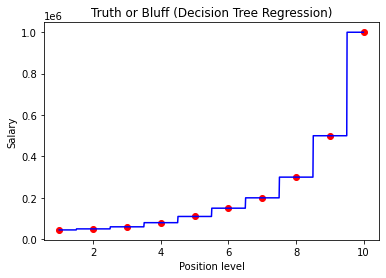

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [21]:
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [22]:
#Import export_graphviz package
from sklearn.tree import export_graphviz  
  


In [23]:
#Store the decision tree in a tree.dot file in order to visualize the plot.
#Visualize it on http://www.webgraphviz.com/ by copying and pasting related data from dtregression.dot file
export_graphviz(regressor, out_file ='dtregression.dot', 
               feature_names =['Position level'])

In [24]:
from sklearn import tree

In [33]:
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_0 <= 8.50
|   |--- feature_0 <= 6.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- value: [45000.00]
|   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |--- value: [50000.00]
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- value: [60000.00]
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- value: [80000.00]
|   |   |--- feature_0 >  4.50
|   |   |   |--- feature_0 <= 5.50
|   |   |   |   |--- value: [110000.00]
|   |   |   |--- feature_0 >  5.50
|   |   |   |   |--- value: [150000.00]
|   |--- feature_0 >  6.50
|   |   |--- feature_0 <= 7.50
|   |   |   |--- value: [200000.00]
|   |   |--- feature_0 >  7.50
|   |   |   |--- value: [300000.00]
|--- feature_0 >  8.50
|   |--- feature_0 <= 9.50
|   |   |--- value: [500000.00]
|   |--- feature_0 >  9.50
|   |   |--- value: [1000000.00]



In [34]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

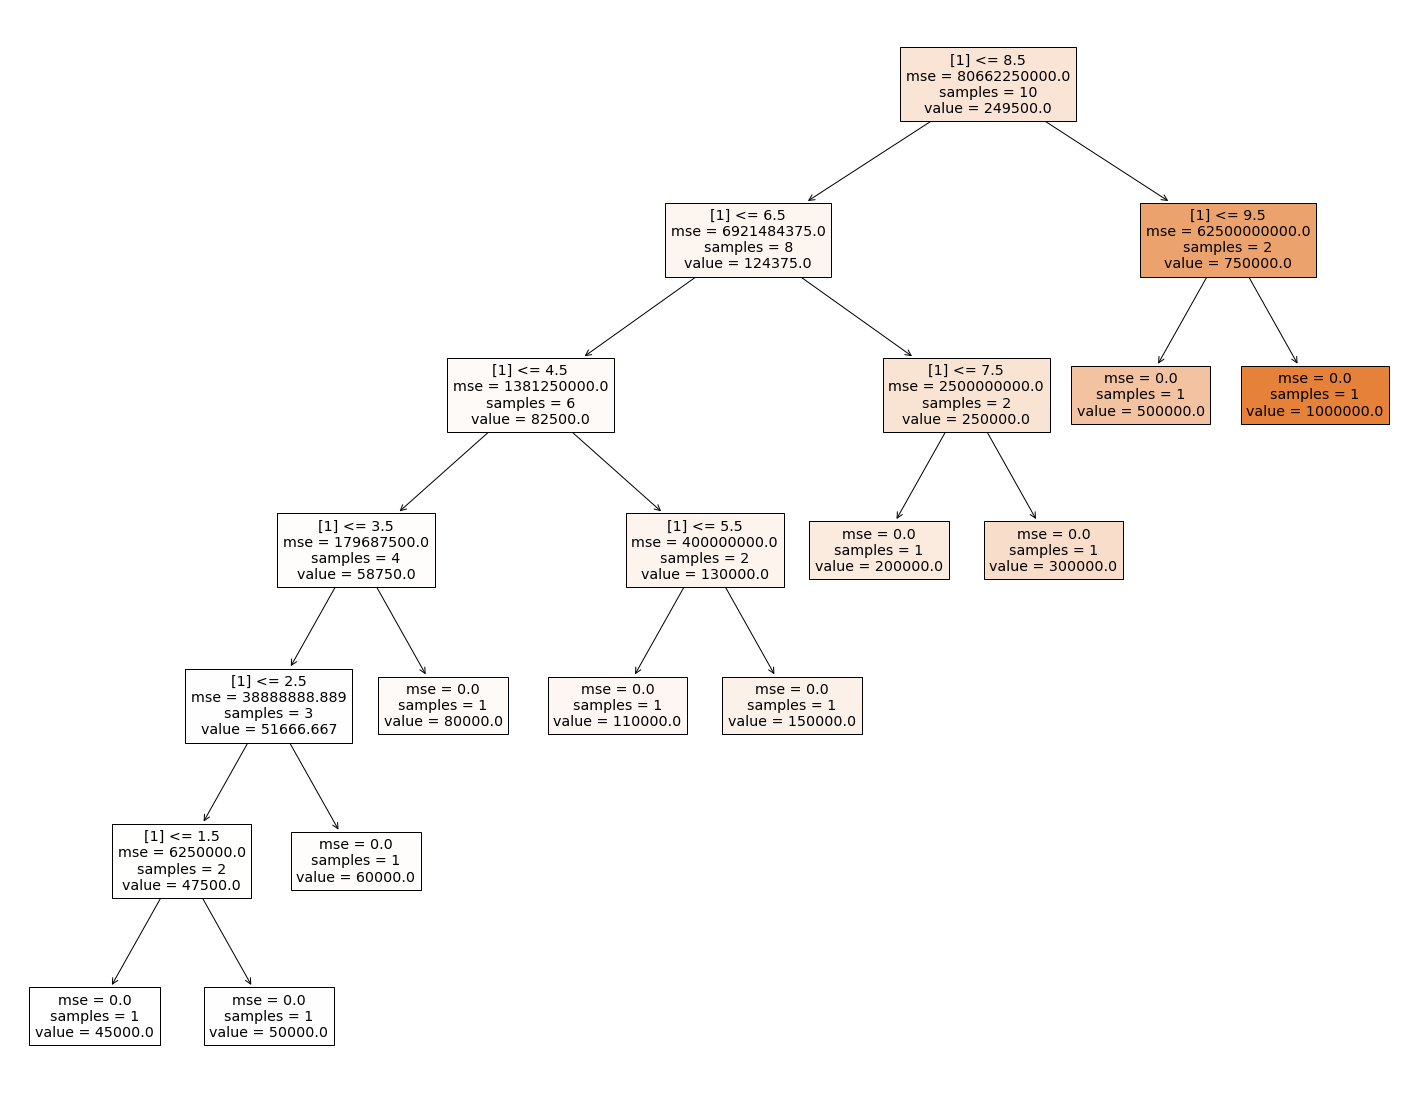

In [35]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, 
                   feature_names=X,  
                   class_names=y,
                   filled=True)

In [36]:
fig.savefig("decistion_tree.png")